# Pymaceuticals Inc.
---



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
len(mouse_study_df['Mouse ID'].unique())

249

In [8]:
#Total Count of rows w/ duplicate
mouse_study_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouseID = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'])]

duplicate_mouseID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
duplicate_mouseID["Mouse ID"].unique()

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouseID = mouse_study_df[mouse_study_df['Mouse ID'] == "g989"]
dup_mouseID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df[mouse_study_df['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
mouse_df = mouse_study_df[mouse_study_df['Mouse ID'] != "g989"]
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
mouse_counts = mouse_df['Mouse ID'].value_counts()
mouse_counts

k483    10
g288    10
u327    10
l471    10
a411    10
        ..
x336     1
d133     1
n482     1
x226     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

In [15]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df['Mouse ID'].unique())

248

## Summary Statistics

In [16]:
#test = mouse_df.groupby("Drug Regimen"). 

In [17]:
mean_tumor_volume = mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume = mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_variance= mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_stddev = mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_stderr = mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
print(mean_tumor_volume, median_tumor_volume,tumor_volume_variance,tumor_volume_stddev,tumor_volume_stderr)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


drug_regimen_summary = pd.DataFrame({ "Mean Tumor Volume":mean_tumor_volume,
                                    "Median Tumor Volume": median_tumor_volume,
                                    "Tumor Volume Variance": tumor_volume_variance,
                                    "Tumor Volume Std. Dev.": tumor_volume_stddev,
                                    "Tumor Volume Std. Err.": tumor_volume_stderr
                                  })
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","min","max","std","sem"]})

Tumor Volume (mm3)                                          
                           mean        min        max       std       sem
Drug Regimen                                                             
Capomulin             40.675741  23.343598  48.158209  4.994774  0.329346
Ceftamin              52.591172  45.000000  68.923185  6.268188  0.469821
Infubinol             52.884795  36.321346  72.226731  6.567243  0.492236
Ketapril              55.235638  45.000000  78.567014  8.279709  0.603860
Naftisol              54.331565  45.000000  76.668817  8.134708  0.596466
Placebo               54.033581  45.000000  73.212939  7.821003  0.581331
Propriva              52.320930  45.000000  72.455421  6.622085  0.544332
Ramicane              40.216745  22.050126  47.622816  4.846308  0.320955
Stelasyn              54.233149  45.000000  75.123690  7.710419  0.573111
Zoniferol             53.236507  45.000000  73.324432  6.966589  0.516398

## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_df = mouse_df.groupby(["Drug Regimen"]).count()
drug_regimen_df["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

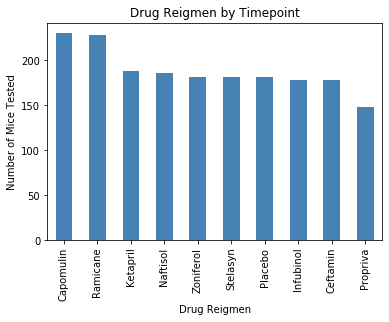

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_df['Tumor Volume (mm3)'].sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Drug Reigmen by Timepoint')
plt.ylabel('Number of Mice Tested')
plt.xlabel("Drug Reigmen")
plt.show()

In [22]:
x_axis = np.arange(len(drug_regimen_df))
tick_locations = [value for value in x_axis]
tick_locations

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
drug_index = drug_regimen_df.index.tolist()
drug_index

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

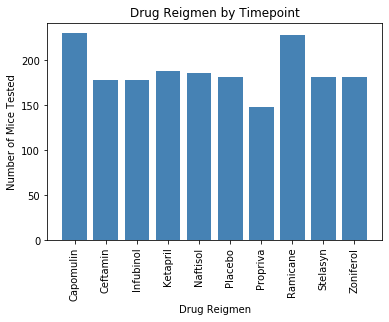

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis, drug_regimen_df["Tumor Volume (mm3)"], color='steelblue', align="center")
plt.xticks(tick_locations,drug_index, rotation = "vertical")
plt.title('Drug Reigmen by Timepoint')
plt.ylabel('Number of Mice Tested')
plt.xlabel("Drug Reigmen")

plt.show()

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = mouse_df.groupby(["Sex"]).count()["Mouse ID"]
mouse_gender = mouse_gender.reset_index()
mouse_gender

,Sex,Mouse ID
0,Female,922
1,Male,958


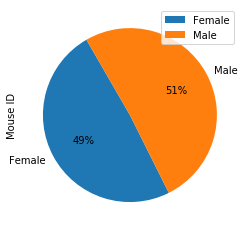

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = mouse_gender["Sex"]
colors = ["#1f77b4", "#ff7f0e"]   


mouse_gender.plot(kind='pie', y= 'Mouse ID',  autopct='%1.0f%%', labels = labels, colors=colors, startangle=120)
plt.show()

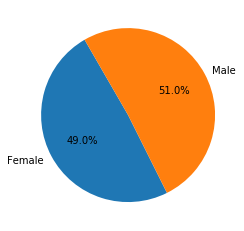

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse = mouse_gender["Sex"] 
mouseid = mouse_gender["Mouse ID"]         
colors = ["#1f77b4", "#ff7f0e"]    

plt.pie(mouseid , labels=mouse , colors=colors, autopct='%1.1f%%', startangle=120)
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_treatment= mouse_df[mouse_df["Drug Regimen"].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
mouse_treatment

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [29]:
# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint = mouse_treatment.groupby(["Mouse ID"]).max()["Timepoint"].reset_index()
mouse_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [30]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mouse_tumorvolume = pd.merge(mouse_timepoint, mouse_treatment, on=("Mouse ID","Timepoint"))
mouse_tumorvolume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [31]:
#Put treatments into a list for for loop (and later for plot labels)
treatment  = ['Capomulin','Ramicane','Infubinol','Ceftamin']
#treatment = pd.DataFrame({"Drug Regimen":treatment})
#treatment

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
#for loop to fiil empty list
 
for drug in treatment:
# Locate the rows which contain mice on each drug and get the tumor volumes    

    tumorvolume = mouse_tumorvolume.loc[mouse_tumorvolume["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
# add subset 
    tumor_volume.append(tumorvolume)
    
 # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumorvolume.quantile([.25,.5,.75])
    lower  = quartiles[0.25]
    upper  = quartiles[0.75]
    iqr = upper - lower
  
    lowerbounds = lower - (1.5*iqr)
    upperbound = upper + (1.5*iqr)
    
    #Determine outliers using upper and lower bounds
    #outliers
    outliers = tumorvolume.loc[(tumorvolume<lowerbounds) | (tumorvolume>upperbound)]
    
    print(f"{drug} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [32]:
len(tumor_volume)

4

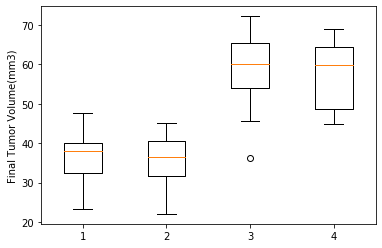

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.boxplot(tumor_volume)
plt.show()

## Line and Scatter Plots

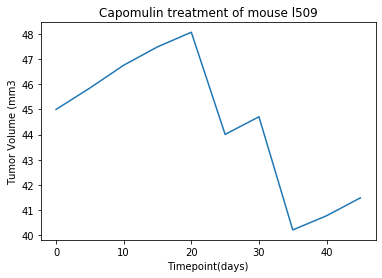

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_scatters_capolumlin = mouse_treatment[mouse_treatment['Mouse ID'] == "l509"]

plt.plot(line_scatters_capolumlin["Timepoint"], line_scatters_capolumlin["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel('Timepoint(days)')
plt.ylabel("Tumor Volume (mm3")

plt.show()

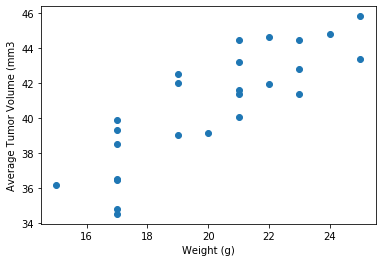

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_treatment[mouse_treatment['Drug Regimen'] == "Capomulin"]
avg_mouseid_tumorvolume = capomulin_df.groupby(["Mouse ID"]).mean()
avg_mouseid_tumorvolume = avg_mouseid_tumorvolume[["Tumor Volume (mm3)","Weight (g)"]]

plt.scatter(avg_mouseid_tumorvolume['Weight (g)'],avg_mouseid_tumorvolume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3")


#avg_mouseid_tumorvolume
plt.show()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_mouseid_tumorvolume = avg_mouseid_tumorvolume[["Tumor Volume (mm3)","Weight (g)"]]
#avg_mouseid_tumorvolume
tumor_volumemm3 = avg_mouseid_tumorvolume.iloc[:,0]
weight = avg_mouseid_tumorvolume.iloc[:,1]
correlation = st.pearsonr(tumor_volumemm3,weight)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [37]:

correlation

(0.8419363424694716, 1.3225722434712883e-07)

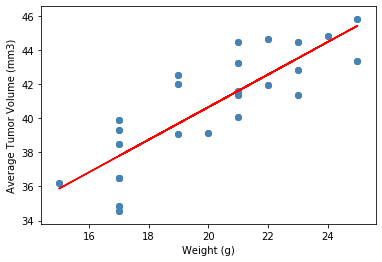

In [39]:
x_values = avg_mouseid_tumorvolume['Weight (g)']
y_values = avg_mouseid_tumorvolume['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values , color = "steelblue")
plt.plot(x_values,regress_values,"r-")
plt.show()